In [1]:
import torch

In [2]:
torch.__version__

'1.0.0'

In [3]:
torch.tensor

<function _VariableFunctions.tensor>

In [4]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]) 
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [5]:
#height of people
t_c = torch.tensor([58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0])

In [6]:
#weight of people
t_u = torch.tensor([115.0, 117.0, 120.0, 123.0, 126.0, 129.0, 132.0, 135.0, 139.0, 142.0, 146.0, 150.0, 154.0, 159.0,164.0])

In [7]:
def model(t_u, w, b):
    return w * t_u + b

In [8]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [9]:
w = torch.ones(1)
b = torch.zeros(1)

t_p = model(t_u, w, b)
t_p

tensor([115., 117., 120., 123., 126., 129., 132., 135., 139., 142., 146., 150.,
        154., 159., 164.])

In [10]:
loss = loss_fn(t_p, t_c)
loss

tensor(5259.7334)

In [11]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [12]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [13]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - 
                         loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [14]:
b

tensor([544.])

In [15]:
from torch import nn
loss = nn.MSELoss()
input = torch.randn(10, 5, requires_grad=True)
target = torch.randn(10, 5)
output = loss(input, target)
output.backward()

In [16]:
output.grad_fn

In [17]:
input

tensor([[ 0.8859,  0.6191, -1.0659,  0.6297, -0.4632],
        [ 0.2227,  2.0000,  0.6790,  0.4427,  0.1115],
        [-0.6893,  0.7987, -1.1410,  0.6632, -1.0046],
        [-0.8557, -0.0734,  1.9588,  1.6856,  1.1600],
        [ 1.1398,  0.4653,  1.7257,  1.0230, -0.1304],
        [-2.0455,  0.6760, -2.3646,  0.3130,  1.5989],
        [-0.4178,  0.1821,  0.6093,  0.7205, -1.3646],
        [-0.7084, -0.7813, -0.5034,  0.5327, -1.0042],
        [-1.1541, -0.3004,  0.0798, -0.5389, -1.2169],
        [-0.0305,  0.9210,  0.7428,  0.7587, -1.0676]], requires_grad=True)

In [18]:
target

tensor([[-0.1632, -0.2487, -2.5970, -0.1084, -0.1682],
        [-0.5009,  0.3028, -0.6597,  0.1756, -0.6517],
        [-2.2744,  0.8055, -0.8771, -0.4889, -0.2087],
        [-1.2697,  1.2413,  1.3742, -1.6723,  0.7320],
        [-1.3509,  0.0558,  0.1569,  0.6511, -0.6459],
        [-1.2040,  1.0124,  1.2735,  0.7432, -1.6206],
        [ 0.3371,  0.6652,  0.8029,  1.2944,  0.1032],
        [ 0.1347, -0.2712, -0.0211,  0.4950, -2.3095],
        [ 0.8757, -0.2987, -0.0510, -0.5252,  1.2859],
        [-1.4819,  1.4009, -0.9651,  0.2017, -0.3012]])

In [19]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c)
    return dsq_diffs

In [20]:
def model(t_u, w, b):
    return w * t_u + b

In [21]:
def dmodel_dw(t_u, w, b):
    return t_u

In [22]:
def dmodel_db(t_u, w, b):
    return 1.0

In [23]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

In [24]:
params = torch.tensor([1.0, 0.0])

nepochs = 10

learning_rate = 0.005

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_u, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 5259.733398
Params: tensor([1., 0.])
Grad: tensor([19936.2676,   143.4667])
Epoch 1, Loss 186035536.000000
Params: tensor([-98.6813,  -0.7173])
Grad: tensor([-3752241.5000,   -27117.4902])
Epoch 2, Loss 6590066851840.000000
Params: tensor([18662.5254,   134.8701])
Grad: tensor([7.0622e+08, 5.1037e+06])
Epoch 3, Loss 233444615137525760.000000
Params: tensor([-3512419.0000,   -25383.7188])
Grad: tensor([-1.3292e+11, -9.6058e+08])
Epoch 4, Loss 8269473044030732369920.000000
Params: tensor([6.6108e+08, 4.7775e+06])
Grad: tensor([2.5017e+13, 1.8079e+11])
Epoch 5, Loss 292935421141896175944728576.000000
Params: tensor([-1.2442e+11, -8.9919e+08])
Grad: tensor([-4.7085e+15, -3.4027e+13])
Epoch 6, Loss 10376860711843314876999100530688.000000
Params: tensor([2.3418e+13, 1.6924e+11])
Grad: tensor([8.8619e+17, 6.4043e+15])
Epoch 7, Loss 367587022415262077831175308750880768.000000
Params: tensor([-4.4075e+15, -3.1852e+13])
Grad: tensor([-1.6679e+20, -1.2054e+18])
Epoch 8, Loss inf
Par

tensor([2.9386e+22, 2.1237e+20])

In [25]:
params = torch.tensor([1.0, 0.0])

nepochs = 10

learning_rate = 0.1

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_u, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 5259.733398
Params: tensor([1., 0.])
Grad: tensor([19936.2676,   143.4667])
Epoch 1, Loss 75167326208.000000
Params: tensor([-1992.6268,   -14.3467])
Grad: tensor([-75423632.0000,   -545075.7500])
Epoch 2, Loss 1075861613698875392.000000
Params: tensor([7540371.0000,   54493.2266])
Grad: tensor([2.8535e+11, 2.0621e+09])
Epoch 3, Loss 15398684787475107786260480.000000
Params: tensor([-2.8527e+10, -2.0616e+08])
Grad: tensor([-1.0795e+15, -7.8016e+12])
Epoch 4, Loss 220399653030205321522018852536320.000000
Params: tensor([1.0792e+14, 7.7995e+11])
Grad: tensor([4.0841e+18, 2.9515e+16])
Epoch 5, Loss inf
Params: tensor([-4.0830e+17, -2.9508e+15])
Grad: tensor([-1.5451e+22, -1.1166e+20])
Epoch 6, Loss inf
Params: tensor([1.5447e+21, 1.1163e+19])
Grad: tensor([5.8456e+25, 4.2245e+23])
Epoch 7, Loss inf
Params: tensor([-5.8440e+24, -4.2234e+22])
Grad: tensor([-2.2115e+29, -1.5982e+27])
Epoch 8, Loss inf
Params: tensor([2.2109e+28, 1.5978e+26])
Grad: tensor([8.3667e+32, 6.0465e+30

tensor([3.1645e+35, 2.2869e+33])

In [26]:
t_un = 0.1 * t_u

In [27]:
params = torch.tensor([1.0, 0.0])

nepochs = 10

learning_rate = 0.05

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_un, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_un, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 2642.455322
Params: tensor([1., 0.])
Grad: tensor([-1412.0093,  -102.6533])
Epoch 1, Loss 855426.312500
Params: tensor([71.6005,  5.1327])
Grad: tensor([25443.8496,  1838.2993])
Epoch 2, Loss 277741664.000000
Params: tensor([-1200.5920,   -86.7823])
Grad: tensor([-458472.5000,  -33135.7539])
Epoch 3, Loss 90178600960.000000
Params: tensor([21723.0332,  1570.0054])
Grad: tensor([8261226.5000,  597062.5625])
Epoch 4, Loss 29279651889152.000000
Params: tensor([-391338.3125,  -28283.1230])
Grad: tensor([-1.4886e+08, -1.0758e+07])
Epoch 5, Loss 9506668517785600.000000
Params: tensor([7051623.0000,  509641.6250])
Grad: tensor([2.6823e+09, 1.9386e+08])
Epoch 6, Loss 3086673836062539776.000000
Params: tensor([-1.2706e+08, -9.1832e+06])
Grad: tensor([-4.8332e+10, -3.4931e+09])
Epoch 7, Loss 1002197495184057434112.000000
Params: tensor([2.2896e+09, 1.6547e+08])
Grad: tensor([8.7090e+11, 6.2943e+10])
Epoch 8, Loss 325398583876400447488000.000000
Params: tensor([-4.1256e+10, -2.9817e

tensor([-1.3395e+13, -9.6810e+11])

In [28]:
params = torch.tensor([1.0, 0.0])

nepochs = 50

learning_rate = 1e-2

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_un, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_un, t_c, t_p, w, b)

    params = params - learning_rate * grad
    
params

Epoch 0, Loss 2642.455322
Epoch 1, Loss 20719.341797
Epoch 2, Loss 162827.500000
Epoch 3, Loss 1279984.500000
Epoch 4, Loss 10062314.000000
Epoch 5, Loss 79103032.000000
Epoch 6, Loss 621854144.000000
Epoch 7, Loss 4888591872.000000
Epoch 8, Loss 38430781440.000000
Epoch 9, Loss 302116732928.000000
Epoch 10, Loss 2375034601472.000000
Epoch 11, Loss 18670898118656.000000
Epoch 12, Loss 146777890095104.000000
Epoch 13, Loss 1153867928567808.000000
Epoch 14, Loss 9070922610769920.000000
Epoch 15, Loss 71309436504768512.000000
Epoch 16, Loss 560585865982640128.000000
Epoch 17, Loss 4406945133585498112.000000
Epoch 18, Loss 34644393132338184192.000000
Epoch 19, Loss 272350525535928975360.000000
Epoch 20, Loss 2141034625275000782848.000000
Epoch 21, Loss 16831353552867562618880.000000
Epoch 22, Loss 132316612736074372874240.000000
Epoch 23, Loss 1040182859106084330668032.000000
Epoch 24, Loss 8177208181270761344860160.000000
Epoch 25, Loss 64283610353060630226796544.000000
Epoch 26, Loss 505

tensor([-9.0577e+22, -6.5463e+21])

In [29]:
def model(t_u, w, b):
    return w * t_u + b

In [30]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [31]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

loss = loss_fn(model(t_u, *params), t_c)

In [32]:
params.grad is None

True

In [33]:
loss.backward()

In [34]:
params.grad

tensor([19936.2695,   143.4667])

In [35]:
if params.grad is not None:
    params.grad.zero_()

In [36]:
def model(t_u, w, b):
    return w * t_u + b

In [37]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [40]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 100

learning_rate = 1e-3

In [41]:
for epoch in range(nepochs):
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    if params.grad is not None:
        params.grad.zero_()

    loss.backward()

    #params.grad.clamp_(-1.0, 1.0)
    #print(params, params.grad)

    params = (params - learning_rate * params.grad).detach().requires_grad_()

params

Epoch 0, Loss 2642.455322
Epoch 1, Loss 1019.346863
Epoch 2, Loss 396.189301
Epoch 3, Loss 156.941177
Epoch 4, Loss 65.086739
Epoch 5, Loss 29.821062
Epoch 6, Loss 16.281319
Epoch 7, Loss 11.082800
Epoch 8, Loss 9.086715
Epoch 9, Loss 8.320149
Epoch 10, Loss 8.025607
Epoch 11, Loss 7.912303
Epoch 12, Loss 7.868583
Epoch 13, Loss 7.851569
Epoch 14, Loss 7.844816
Epoch 15, Loss 7.842016
Epoch 16, Loss 7.840695
Epoch 17, Loss 7.839971
Epoch 18, Loss 7.839478
Epoch 19, Loss 7.839065
Epoch 20, Loss 7.838678
Epoch 21, Loss 7.838317
Epoch 22, Loss 7.837945
Epoch 23, Loss 7.837583
Epoch 24, Loss 7.837236
Epoch 25, Loss 7.836849
Epoch 26, Loss 7.836495
Epoch 27, Loss 7.836150
Epoch 28, Loss 7.835763
Epoch 29, Loss 7.835413
Epoch 30, Loss 7.835062
Epoch 31, Loss 7.834692
Epoch 32, Loss 7.834332
Epoch 33, Loss 7.833957
Epoch 34, Loss 7.833606
Epoch 35, Loss 7.833253
Epoch 36, Loss 7.832891
Epoch 37, Loss 7.832518
Epoch 38, Loss 7.832154
Epoch 39, Loss 7.831804
Epoch 40, Loss 7.831444
Epoch 41, Lo

tensor([4.7079, 0.3282], requires_grad=True)

In [42]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [43]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-5

optimizer = optim.SGD([params], lr=learning_rate)

In [44]:
t_p = model(t_u, *params)

loss = loss_fn(t_p, t_c)

loss.backward()

optimizer.step()

params

tensor([ 0.8006, -0.0014], requires_grad=True)

In [45]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)

loss = loss_fn(t_p, t_c)

optimizer.zero_grad()

loss.backward()

optimizer.step()

params

tensor([15.1201,  1.0265], requires_grad=True)

In [46]:
def model(t_u, w, b):
    return w * t_u + b

In [47]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [49]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 100
learning_rate = 1e-3

optimizer = optim.SGD([params], lr=learning_rate)

In [50]:
for epoch in range(nepochs):
    
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    # backward pass
    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()

t_p = model(t_un, *params)

params

Epoch 0, Loss 2642.455322
Epoch 1, Loss 1019.346863
Epoch 2, Loss 396.189301
Epoch 3, Loss 156.941177
Epoch 4, Loss 65.086739
Epoch 5, Loss 29.821062
Epoch 6, Loss 16.281319
Epoch 7, Loss 11.082800
Epoch 8, Loss 9.086715
Epoch 9, Loss 8.320149
Epoch 10, Loss 8.025607
Epoch 11, Loss 7.912303
Epoch 12, Loss 7.868583
Epoch 13, Loss 7.851569
Epoch 14, Loss 7.844816
Epoch 15, Loss 7.842016
Epoch 16, Loss 7.840695
Epoch 17, Loss 7.839971
Epoch 18, Loss 7.839478
Epoch 19, Loss 7.839065
Epoch 20, Loss 7.838678
Epoch 21, Loss 7.838317
Epoch 22, Loss 7.837945
Epoch 23, Loss 7.837583
Epoch 24, Loss 7.837236
Epoch 25, Loss 7.836849
Epoch 26, Loss 7.836495
Epoch 27, Loss 7.836150
Epoch 28, Loss 7.835763
Epoch 29, Loss 7.835413
Epoch 30, Loss 7.835062
Epoch 31, Loss 7.834692
Epoch 32, Loss 7.834332
Epoch 33, Loss 7.833957
Epoch 34, Loss 7.833606
Epoch 35, Loss 7.833253
Epoch 36, Loss 7.832891
Epoch 37, Loss 7.832518
Epoch 38, Loss 7.832154
Epoch 39, Loss 7.831804
Epoch 40, Loss 7.831444
Epoch 41, Lo

tensor([4.7079, 0.3282], requires_grad=True)

In [51]:
def model(t_u, w, b):
    return w * t_u + b

In [52]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [55]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 100
learning_rate = 1e-1

optimizer = optim.Adam([params], lr=learning_rate)

In [56]:
for epoch in range(nepochs):
    # forward pass
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

t_p = model(t_u, *params)

params

Epoch 0, Loss 5259.733398
Epoch 1, Loss 3443.706055
Epoch 2, Loss 2025.263428
Epoch 3, Loss 1002.203430
Epoch 4, Loss 357.638977
Epoch 5, Loss 53.362339
Epoch 6, Loss 24.627544
Epoch 7, Loss 181.475250
Epoch 8, Loss 421.412689
Epoch 9, Loss 651.219666
Epoch 10, Loss 806.726135
Epoch 11, Loss 860.188843
Epoch 12, Loss 815.021912
Epoch 13, Loss 694.658447
Epoch 14, Loss 531.592957
Epoch 15, Loss 359.055267
Epoch 16, Loss 205.425735
Epoch 17, Loss 90.802734
Epoch 18, Loss 25.268084
Epoch 19, Loss 8.697300
Epoch 20, Loss 32.116177
Epoch 21, Loss 80.485817
Epoch 22, Loss 136.450882
Epoch 23, Loss 184.215622
Epoch 24, Loss 212.605209
Epoch 25, Loss 216.650848
Epoch 26, Loss 197.548569
Epoch 27, Loss 161.313400
Epoch 28, Loss 116.688927
Epoch 29, Loss 72.884323
Epoch 30, Loss 37.597633
Epoch 31, Loss 15.638309
Epoch 32, Loss 8.321149
Epoch 33, Loss 13.663870
Epoch 34, Loss 27.273088
Epoch 35, Loss 43.663616
Epoch 36, Loss 57.666039
Epoch 37, Loss 65.575615
Epoch 38, Loss 65.794014
Epoch 39, L

tensor([ 0.4742, -0.3750], requires_grad=True)

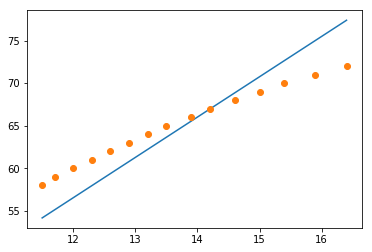

In [57]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(0.1 * t_u.numpy(), t_p.detach().numpy())
plt.plot(0.1 * t_u.numpy(), t_c.numpy(), 'o')

In [58]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 2,  0, 10, 13,  7,  5, 12, 14,  1,  6,  4,  3]),
 tensor([ 8,  9, 11]))

In [59]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

In [60]:
def model(t_u, w, b):
    return w * t_u + b

In [61]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [69]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 100
learning_rate = 1e-3

optimizer = optim.SGD([params], lr=learning_rate)

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [70]:
for epoch in range(nepochs):
    
    # forward pass
    t_p_train = model(t_un_train, *params)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_un_val, *params)
    loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), 
                                                              float(loss_val)))
        
    # backward pass
    optimizer.zero_grad()
    loss_train.backward()    
    optimizer.step()

t_p = model(t_un, *params)

params

Epoch 0, Training loss 2601.548340, Validation loss 2806.083252
Epoch 1, Training loss 1032.810425, Validation loss 1087.461426
Epoch 2, Training loss 413.472137, Validation loss 416.879730
Epoch 3, Training loss 168.956818, Validation loss 157.116455
Epoch 4, Training loss 72.421867, Validation loss 57.692535
Epoch 5, Training loss 34.309498, Validation loss 20.406885
Epoch 6, Training loss 19.262449, Validation loss 6.922363
Epoch 7, Training loss 13.321537, Validation loss 2.375138
Epoch 8, Training loss 10.975765, Validation loss 1.067700
Epoch 9, Training loss 10.049333, Validation loss 0.858009
Epoch 10, Training loss 9.683274, Validation loss 0.967766
Epoch 11, Training loss 9.538424, Validation loss 1.132040
Epoch 12, Training loss 9.480930, Validation loss 1.272863
Epoch 13, Training loss 9.457908, Validation loss 1.376170
Epoch 14, Training loss 9.448518, Validation loss 1.446910
Epoch 15, Training loss 9.444493, Validation loss 1.493633
Epoch 16, Training loss 9.442599, Vali

tensor([4.7196, 0.3438], requires_grad=True)

In [71]:
for epoch in range(nepochs):
    
    # forward pass
    t_p_train = model(t_un_train, *params)
    loss_train = loss_fn(t_p_train, t_c_train)

    with torch.no_grad():
        t_p_val = model(t_un_val, *params)
        loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), 
                                                              float(loss_val)))
        
    # backward pass
    optimizer.zero_grad()
    loss_train.backward()    
    optimizer.step()

params

Epoch 0, Training loss 9.398232, Validation loss 1.568023
Epoch 1, Training loss 9.397709, Validation loss 1.567920
Epoch 2, Training loss 9.397176, Validation loss 1.567803
Epoch 3, Training loss 9.396658, Validation loss 1.567711
Epoch 4, Training loss 9.396147, Validation loss 1.567597
Epoch 5, Training loss 9.395639, Validation loss 1.567492
Epoch 6, Training loss 9.395123, Validation loss 1.567400
Epoch 7, Training loss 9.394602, Validation loss 1.567297
Epoch 8, Training loss 9.394090, Validation loss 1.567192
Epoch 9, Training loss 9.393573, Validation loss 1.567088
Epoch 10, Training loss 9.393056, Validation loss 1.566984
Epoch 11, Training loss 9.392548, Validation loss 1.566869
Epoch 12, Training loss 9.392039, Validation loss 1.566776
Epoch 13, Training loss 9.391503, Validation loss 1.566661
Epoch 14, Training loss 9.390981, Validation loss 1.566569
Epoch 15, Training loss 9.390476, Validation loss 1.566464
Epoch 16, Training loss 9.389967, Validation loss 1.566361
Epoch 1

tensor([4.7144, 0.4154], requires_grad=True)